# Sample example with XGBoost

In [5]:
data = {"height": [1.7, 1.6, 1.5, 1.45], "age": [
    28, 31, 27, 23], "Gender": ['male', 'male', 'female', 'male'], "weight": [77, 78, 73, 72]}

In [6]:
import pandas as pd
df = pd.DataFrame(data)

In [7]:
df

,height,age,Gender,weight
0,1.70,28,male,77
1,1.60,31,male,78
2,1.50,27,female,73
3,1.45,23,male,72


In [9]:
mean = df.weight.mean()

In [62]:
mean

75.0

In [10]:
df['residual'] = df['weight'] - mean

In [11]:
df

,height,age,Gender,weight,residual
0,1.70,28,male,77,2.0
1,1.60,31,male,78,3.0
2,1.50,27,female,73,-2.0
3,1.45,23,male,72,-3.0


In [28]:
pd.get_dummies(df[['height', 'age', 'Gender']]).columns

Index(['height', 'age', 'Gender_female', 'Gender_male'], dtype='object')

In [20]:
X = pd.get_dummies(df[['height', 'age', 'Gender']]).values
y = df['residual'].values

In [21]:
X

array([[ 1.7 , 28.  ,  0.  ,  1.  ],
       [ 1.6 , 31.  ,  0.  ,  1.  ],
       [ 1.5 , 27.  ,  1.  ,  0.  ],
       [ 1.45, 23.  ,  0.  ,  1.  ]])

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier()

In [24]:
model.fit(X, y)

DecisionTreeClassifier()

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

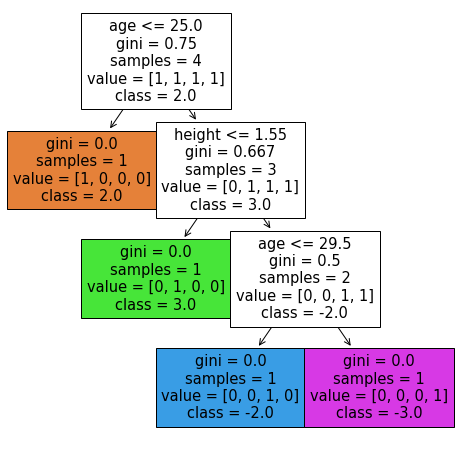

In [63]:
plt.figure(figsize=(8, 8))
plot_tree(model, feature_names=pd.get_dummies(
    df[['height', 'age', 'Gender']]).columns, filled=True, class_names=[str(i) for i in y])
plt.show()

In [64]:
0.1 * model.predict(X)

array([ 0.2,  0.3, -0.2, -0.3])

In [65]:
df['residual 2'] = df['residual'] - 0.1 * model.predict(X)

In [66]:
df

,height,age,Gender,weight,residual,residual 2
0,1.70,28,male,77,2.0,1.8
1,1.60,31,male,78,3.0,2.7
2,1.50,27,female,73,-2.0,-1.8
3,1.45,23,male,72,-3.0,-2.7
